In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten

from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

In [ ]:
!pip install emnist

from emnist import extract_training_samples, extract_test_samples, extract_samples, extract_data

X_train, Y_train = extract_training_samples('letters')
X_test, Y_test = extract_test_samples('letters')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X_train.shape

(124800, 28, 28)

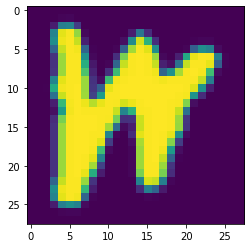

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0],)
# plt.show()

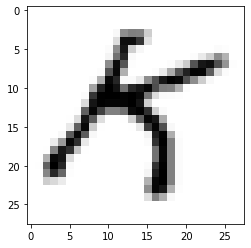

In [ ]:
plt.imshow(X_train[7], cmap= plt.cm.binary)
# plt.show()

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [ ]:
X_test.shape

(20800, 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
Y_train = Y_train-1
Y_test = Y_test-1

In [ ]:
NAME = "Char-Recog {}".format(int(time.time()))
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

In [ ]:
def testing(model):
  print("Testing :")
  result = model.evaluate(X_test, Y_test)
  return dict(zip(model.metrics_names, result))

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(26, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=20,
          epochs=2,
          validation_split=0.1,
          callbacks=[tensorboard])

Epoch 1/2
5616/5616 [==============================] - 217s 38ms/step - loss: 0.5536 - accuracy: 0.8310 - val_loss: 0.3136 - val_accuracy: 0.9016
Epoch 2/2
5616/5616 [==============================] - 203s 36ms/step - loss: 0.2836 - accuracy: 0.9083 - val_loss: 0.2618 - val_accuracy: 0.9157


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1/1 [==============================] - 0s 20ms/step
The number is 0


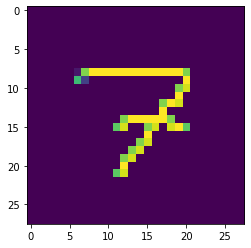

1/1 [==============================] - 0s 19ms/step
The number is 0


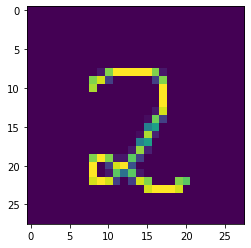

1/1 [==============================] - 0s 21ms/step
The number is 0


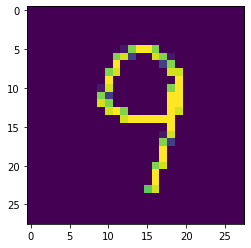

1/1 [==============================] - 0s 22ms/step
The number is 0


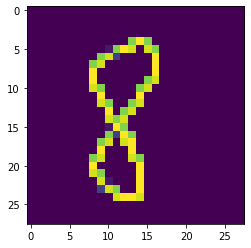

1/1 [==============================] - 0s 21ms/step
The number is 0


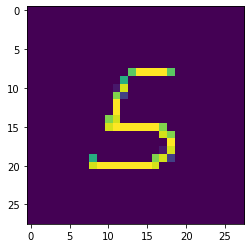

1/1 [==============================] - 0s 21ms/step
The number is 0


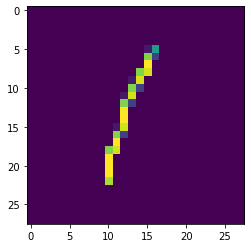

1/1 [==============================] - 0s 20ms/step
The number is 0


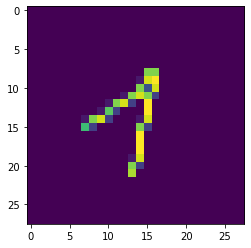

1/1 [==============================] - 0s 18ms/step
The number is 0


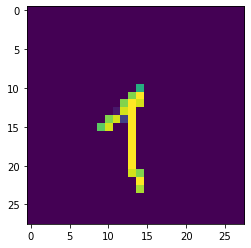

1/1 [==============================] - 0s 20ms/step
The number is 0


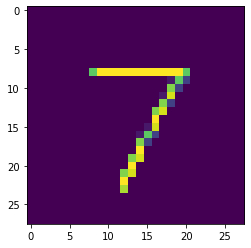

1/1 [==============================] - 0s 26ms/step
The number is 0


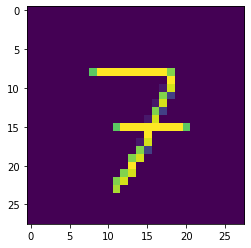

1/1 [==============================] - 0s 19ms/step
The number is 0


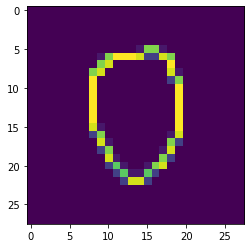

1/1 [==============================] - 0s 23ms/step
The number is 0


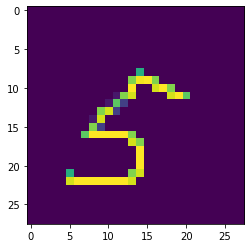

1/1 [==============================] - 0s 23ms/step
The number is 0


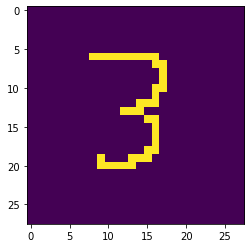

1/1 [==============================] - 0s 19ms/step
The number is 0


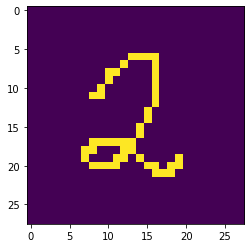

1/1 [==============================] - 0s 18ms/step
The number is 0


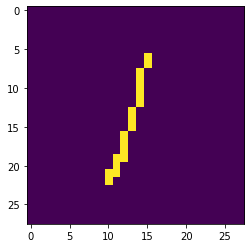

1/1 [==============================] - 0s 19ms/step
The number is 0


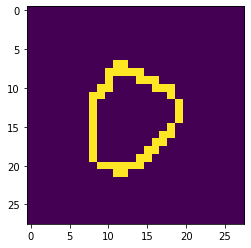

1/1 [==============================] - 0s 21ms/step
The number is 0


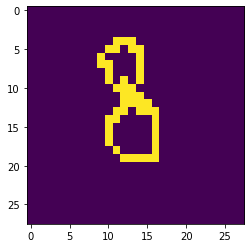

1/1 [==============================] - 0s 20ms/step
The number is 0


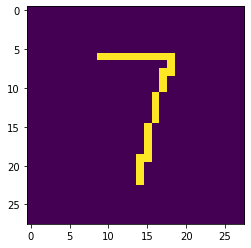

1/1 [==============================] - 0s 20ms/step
The number is 0


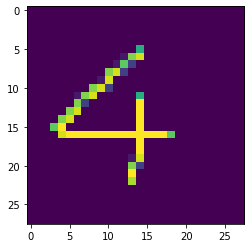

In [ ]:
image_number = 1
while os.path.isfile('/content/drive/MyDrive/digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('/content/drive/MyDrive/digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is {}".format(np.argmax(prediction)))
        plt.imshow(img[0])
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1
